# Scheil-Gulliver simulation tool

## Importing modules

In [41]:
import matplotlib.pyplot as plt
from pycalphad import Database, variables as v
from scheil import simulate_scheil_solidification
import numpy as np


### Defining file paths for program and database

In [42]:
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'

### Datbase

In [43]:
# dbf = Database(dbf_diretory + 'COST507_Sundman.tdb') #Aluminum database
# dbf = Database(dbf_diretory + 'COST507_Original.tdb') #Aluminum database
# dbf = Database(dbf_diretory + 'mc_al_v2.032.pycalphad.tdb') #Aluminum database
# dbf = Database(dbf_diretory + 'mc_al_v2.032.pycalphad_with_ZR_COST507_Sund.tdb') #Combined for Zr and Sc
dbf = Database(dbf_diretory + 'COST507_Sundman_w_Sc-test.tdb') #Aluminum database addition of Sc (GOOD)


### setup the simulation parameters


In [63]:
comps = ['AL', 'ZR', 'SC', 'MN', 'VA']
# comps = ['SI', 'CU', 'FE', 'MG', 'MN', 'ZN', 'NI', 'TI', 'AL',  'VA']

# phases = sorted(dbf.phases.keys())
# phases = ['LIQUID', 'FCC_A1', 'AL3ZR'] #For Al-ZR
# phases = ['LIQUID', 'FCC_A1', 'AL3ZR', 'HCP_A3', 'BCC_A2', 'AL3SC', 'AL2SC', 'ALSC'] #For Al-ZR-Sc
# phases = ['LIQUID', 'FCC_A1', 'AL3ZR', 'AL3SC'] #For Al-ZR-Sc
phases = ['LIQUID', 'FCC_A1', 'AL3ZR', 'AL3SC', 'AL4MN','AL6MN',] #For Al-ZR-SC-MN
phases

['LIQUID', 'FCC_A1', 'AL3ZR', 'AL3SC', 'AL4MN', 'AL6MN']

In [64]:
liquid_phase_name = 'LIQUID'
# initial_composition = {v.X('ZR'): 1.5/100}
# initial_composition = {v.X('ZR'): 2.0/100, v.X('SC'): 0.9/100} #AL-ZR-SC
initial_composition = {v.X('ZR'): 2.0/100, v.X('SC'): 0.9/100, v.X('MN'): 4.0/100} #AL-ZR-SC-MN


# initial_composition = {v.W('SI'): 12.0/100, v.W('CU'): 4.2/100, v.W('FE'): 0.6/100, v.W('MG'): 0.3/100, v.W('MN'): 0.4/100, v.W('ZN'): 0.8/100, v.W('NI'): 0.01/100, v.W('TI'): 1./100}
start_temperature = 1500

### Perform simulation

In [65]:
sol_res = simulate_scheil_solidification(dbf, comps, phases, initial_composition, start_temperature, step_temperature=10)

eq_phases ['LIQUID', '', '', '', '']
eq_phases ['LIQUID', '', '', '', '']
eq_phases ['LIQUID', '', '', '', '']
eq_phases ['LIQUID', '', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['LIQUID', 'AL3ZR', '', '', '']
eq_phases ['

### plot the result

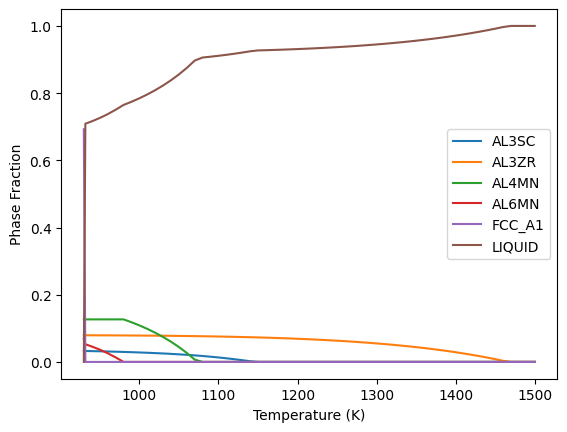

In [66]:
for phase_name, amounts in sol_res.cum_phase_amounts.items():
    plt.plot(sol_res.temperatures, amounts, label=phase_name)

plt.plot(sol_res.temperatures, sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
# plt.title('Al-30Zn Scheil simulation, phase fractions')
plt.legend(loc='best')
plt.show()